# Time Series Analysis

We have been given a problem on Time series analysis. The dataset describes the minimum daily temperatures over 10 years in the city Melbourne, Australia. We have to build the Autocorrelation function and teh Partial autocorrelation function for the daily minimum temperature. We first load and plot the data and then check if the data is random using lag plot. We also plot the ACF and PACF plots and carry out the Augmented dickey fuller test to show that the data is stationary.

# Load and Plot the data

In [5]:
from pandas import Series
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
filename1 = 'daily_temperatures.csv'

In [8]:
series1 = read_csv(filename1, usecols=[1], engine='python', skipfooter=2)

In [9]:
data1 = series1.values
data1 = data1.astype('float32')

In [10]:
feature_range = (0, 1)
scaler = MinMaxScaler(feature_range)

In [11]:
scaled_data1 = scaler.fit_transform(data1)

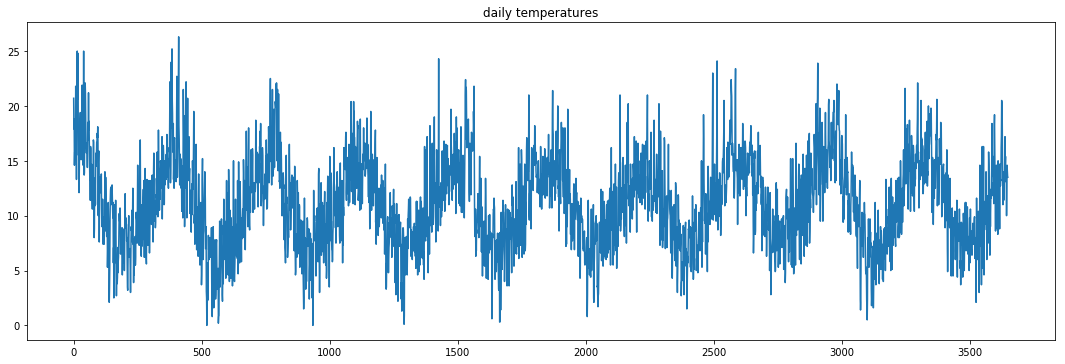

In [15]:
f1, (ax1) = plt.subplots(1, 1, figsize=(15, 5))
f1.tight_layout()
series1.plot(subplots=True, ax=ax1, legend=False, sharex=False, sharey=False)
ax1.set_title('daily temperatures')
plt.show()

# Check if data is random using lag plot

In [18]:
# Random data should not exhibit any structure in the lag plot. Non-random data should.

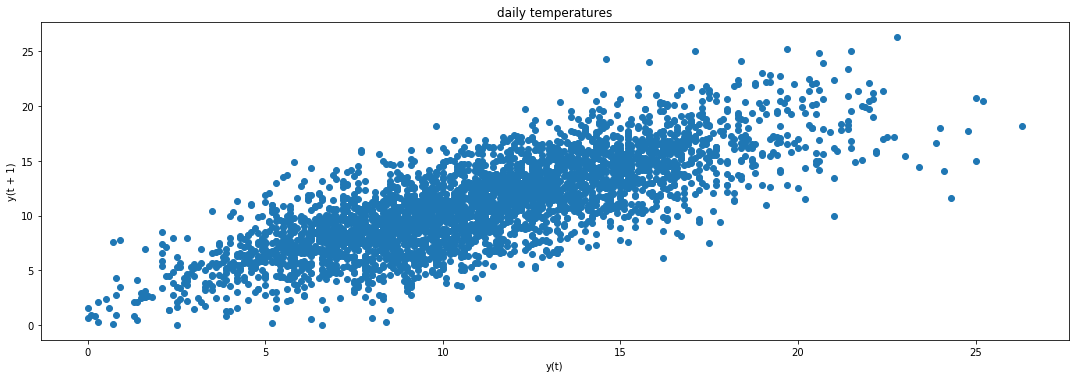

In [19]:
from pandas.plotting import lag_plot
   
f2, (ax2) = plt.subplots(1, 1, figsize=(15, 5))
f2.tight_layout()

lag_plot(series1, ax=ax2)
ax2.set_title('daily temperatures');

plt.show()

In [20]:
# Using Autocorrelation plots. If time series is non random one or more of the autocorrelations will be significantly non-zero.

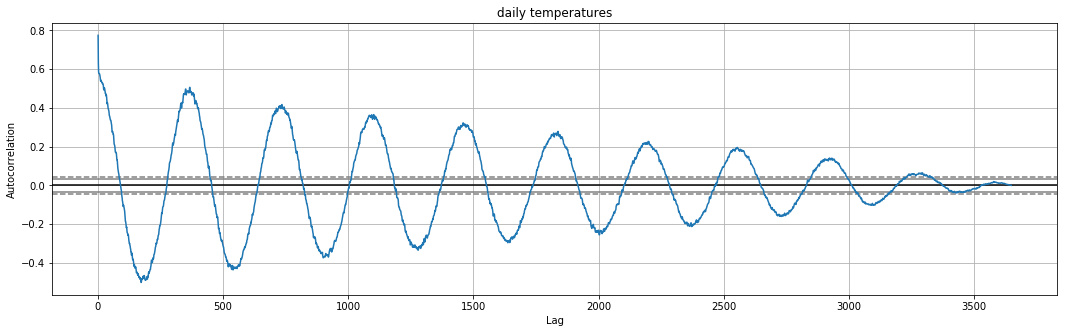

In [21]:
from pandas.plotting import autocorrelation_plot

f3, (ax3) = plt.subplots(1, 1, figsize=(18, 5))

autocorrelation_plot(series1, ax=ax3)
ax3.set_title('daily temperatures');

plt.show()

# AutoCorrelation plot

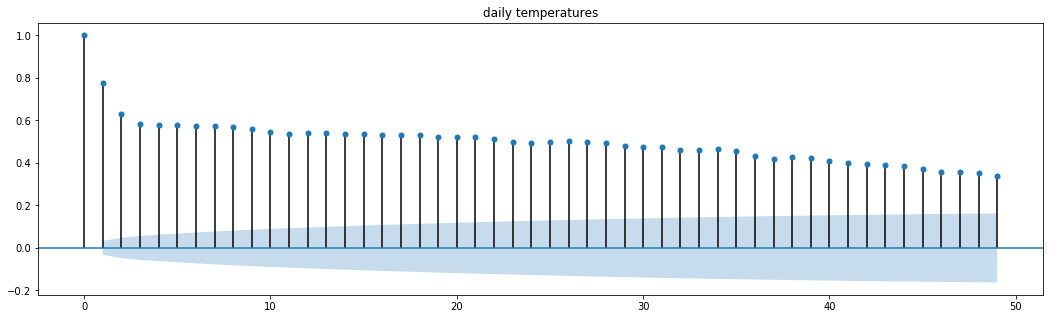

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

f1, (ax1) = plt.subplots(1, 1, figsize=(18, 5))


plot_acf(series1, ax=ax1, lags = range(0,50))
ax1.set_title('daily temperatures')

plt.show()

In [24]:
# Confidence interval shown as cone, values outside of this cone are very likely a correlation and not a statistical fluke.

# Partial Autocorrelation

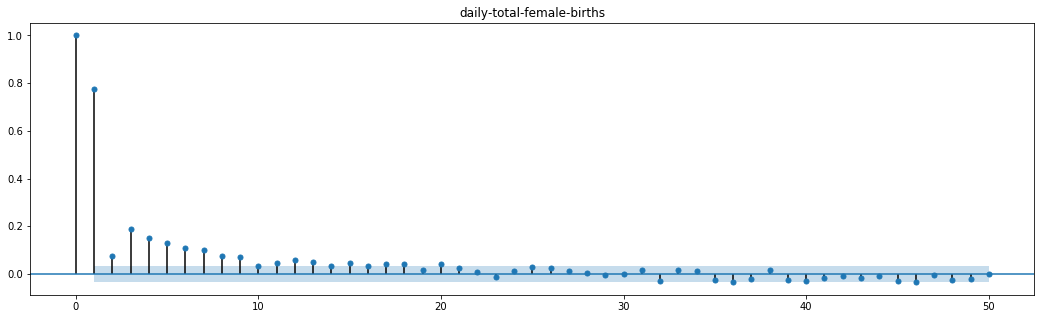

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf

f1, (ax1) = plt.subplots(1, 1, figsize=(18, 5))
#f3.tight_layout()

plot_pacf(series1, ax=ax1, lags = 50)
ax1.set_title('daily-total-female-births')

plt.show()

# Augmented Dickey Fuller test: Shows that our data is stationary

In [30]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

P_result1 = adfuller(data1.flatten())

print(" daily temperatures")
print('ADF Statistic:           %f' % (P_result1[0]))
print('p-value:                 %f' % (P_result1[1]))

print('Critical Values:')

names = []
for name, number in P_result1[4].items():
    names.append(name)
    
for i in range(len(names)):
    value1 = P_result1[4][names[i]]  
    print('            {0:2s}:          {1:.4f}'.format(names[i], value1))

 daily temperatures
ADF Statistic:           -4.448014
p-value:                 0.000244
Critical Values:
            1%:          -3.4322
            5%:          -2.8623
            10%:          -2.5672
